In [1]:
import random
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
import time
import os
import sys
from threading import Timer

from IPython.display import Image
from IPython.display import display
#a function to create an instance of the webdriver
def get_browser():
    options = webdriver.ChromeOptions()
    return webdriver.Chrome(options=options)

def get_inputs(events):
    #extracting workable inputs from those recorded
    inputs=[]
    for event in events:
        inputs.append(events[1][0])
    return inputs

def press(key):
    actionChain.send_keys(key).perform()
#     actionChain.send_keys_to_element(browser.find_element_by_tag_name('iframe'), key).perform()
# find element via engine detection and pass it in
#     check if iframe is still available


In [ ]:
browser = get_browser()
browser.get("https://mattmakesgames.itch.io/celesteclassic") #celeste
screenshots = []

In [26]:
try:
#         browser.get("https://ddrkirbyisq.itch.io/unlock-everything")
#         browser.get("https://unixpapa.com/js/testkey.html")
    browser.get("https://mattmakesgames.itch.io/celesteclassic") #celeste
#         browser.maximize_window()

    iframe_target = browser.find_element_by_css_selector("iframe#game_drop")
    print(iframe_target.size) 
    print(iframe_target.location) 
    assert iframe_target is not None and iframe_target.size["width"] > 10 and iframe_target.size["height"] > 10

    actionChain = ActionChains(browser)
    actionChain.click(iframe_target) # + some engine-specific tags
#         screenshots.append([time.time(),browser.get_screenshot_as_png()])   
#     while(True):
    time.sleep(1)
    press("c")
    press(random.choice(["x","c", Keys.ARROW_LEFT, Keys.ARROW_RIGHT, Keys.ARROW_UP, Keys.ARROW_DOWN])) # chaos monkey
    screenshots.append(iframe_target.screenshot_as_png)
            
except KeyboardInterrupt:
    pass

{'height': 580, 'width': 580}
{'x': 115, 'y': 64}


TypeError: 'bytes' object is not callable

In [36]:
collection_script = '''
(() => {
let events = [];
const observe = (...args) => {
    console.log(args[0]);
    events.push([+new Date(), args]);
}
const inputs = (key, e, map = {
        'mousedown': [e.clientX, e.clientY, e.button],
        'mousemove': [e.clientX, e.clientY, e.button],
        'mouseup': [e.clientX, e.clientY, e.button],
        'keyup': String.fromCharCode(e.keyCode),
        'keydown': String.fromCharCode(e.keyCode),
    }
) => [key, map[key]];
['mousedown', 'mousemove', 'mouseup', 'keyup', 'keydown'].forEach(k=>window.addEventListener(k,e=>observe(inputs(k,e)),true));
window._getRecentEvents = () => events.splice(0, events.length);
})();
'''

In [39]:
events = []

try:
    with get_browser() as browser:
        browser.get("https://mattmakesgames.itch.io/celesteclassic") #celeste

        iframe_target = browser.find_element_by_css_selector("iframe#game_drop")
        assert iframe_target is not None and iframe_target.size["width"] > 10 and iframe_target.size["height"] > 10

        actionChain = ActionChains(browser)
        actionChain.click(iframe_target) # + some engine-specific tags
        time.sleep(3)
        
        while True:
            if browser.find_elements_by_tag_name('iframe'):#detects the iframe that the game is running in
            #or browser.find_element_by_id('game_drop'):
                print("switched to iframe")
                iframe=browser.find_elements_by_tag_name('iframe')[0]
                browser.switch_to.frame(iframe)#switches the browser to the iframe
                browser.execute_script(collection_script)# you need to rerun the collection script once you have switched to the iframe to remedy a javascript error
            batch = browser.execute_script('return window._getRecentEvents();')
            events.extend(batch)
#             if screenshots is not None:
#                 screenshots.append((time.time(), browser.get_screenshot_as_png()))
            
        
#         press("c")
#         press(random.choice(["x","c", Keys.ARROW_LEFT, Keys.ARROW_RIGHT, Keys.ARROW_UP, Keys.ARROW_DOWN])) # chaos monkey
#         display(Image(iframe_target.screenshot_as_png))
except KeyboardInterrupt:
    pass

SessionNotCreatedException: Message: session not created
from chrome not reachable
  (Session info: chrome=77.0.3865.120)


In [38]:
print(events)

[[1572226936452, [['mousemove', [550, 330, 0]]]], [1572226936468, [['mousemove', [511, 332, 0]]]], [1572226936484, [['mousemove', [452, 339, 0]]]], [1572226936500, [['mousemove', [407, 341, 0]]]], [1572226936516, [['mousemove', [387, 343, 0]]]], [1572226936535, [['mousemove', [377, 343, 0]]]], [1572226936550, [['mousemove', [374, 344, 0]]]], [1572226936809, [['mousedown', [374, 344, 0]]]], [1572226936833, [['mousemove', [374, 344, 0]]]], [1572226936930, [['mouseup', [374, 344, 0]]]], [1572226937542, [['keydown', 'C']]], [1572226937545, [['keyup', 'C']]], [1572226937588, [['keydown', 'C']]], [1572226937624, [['keyup', 'C']]], [1572226937711, [['keydown', 'C']]], [1572226937790, [['keyup', 'C']]], [1572226937891, [['keydown', 'C']]], [1572226937961, [['keyup', 'C']]], [1572226938585, [['mousemove', [380, 344, 0]]]], [1572226938608, [['mousemove', [390, 344, 0]]]], [1572226938617, [['mousemove', [397, 344, 0]]]], [1572226938638, [['mousemove', [404, 344, 0]]]], [1572226938651, [['mousemov

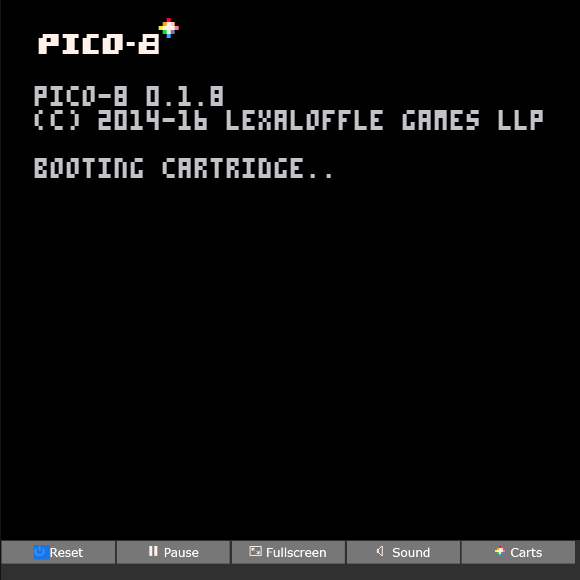

In [28]:
try:
    with get_browser() as browser:
        browser.get("https://mattmakesgames.itch.io/celesteclassic") #celeste

        iframe_target = browser.find_element_by_css_selector("iframe#game_drop")
        assert iframe_target is not None and iframe_target.size["width"] > 10 and iframe_target.size["height"] > 10

        actionChain = ActionChains(browser)
        actionChain.click(iframe_target) # + some engine-specific tags
        time.sleep(1)
        press("c")
        press(random.choice(["x","c", Keys.ARROW_LEFT, Keys.ARROW_RIGHT, Keys.ARROW_UP, Keys.ARROW_DOWN])) # chaos monkey
        display(Image(iframe_target.screenshot_as_png))
except 

In [24]:
# browser.close()

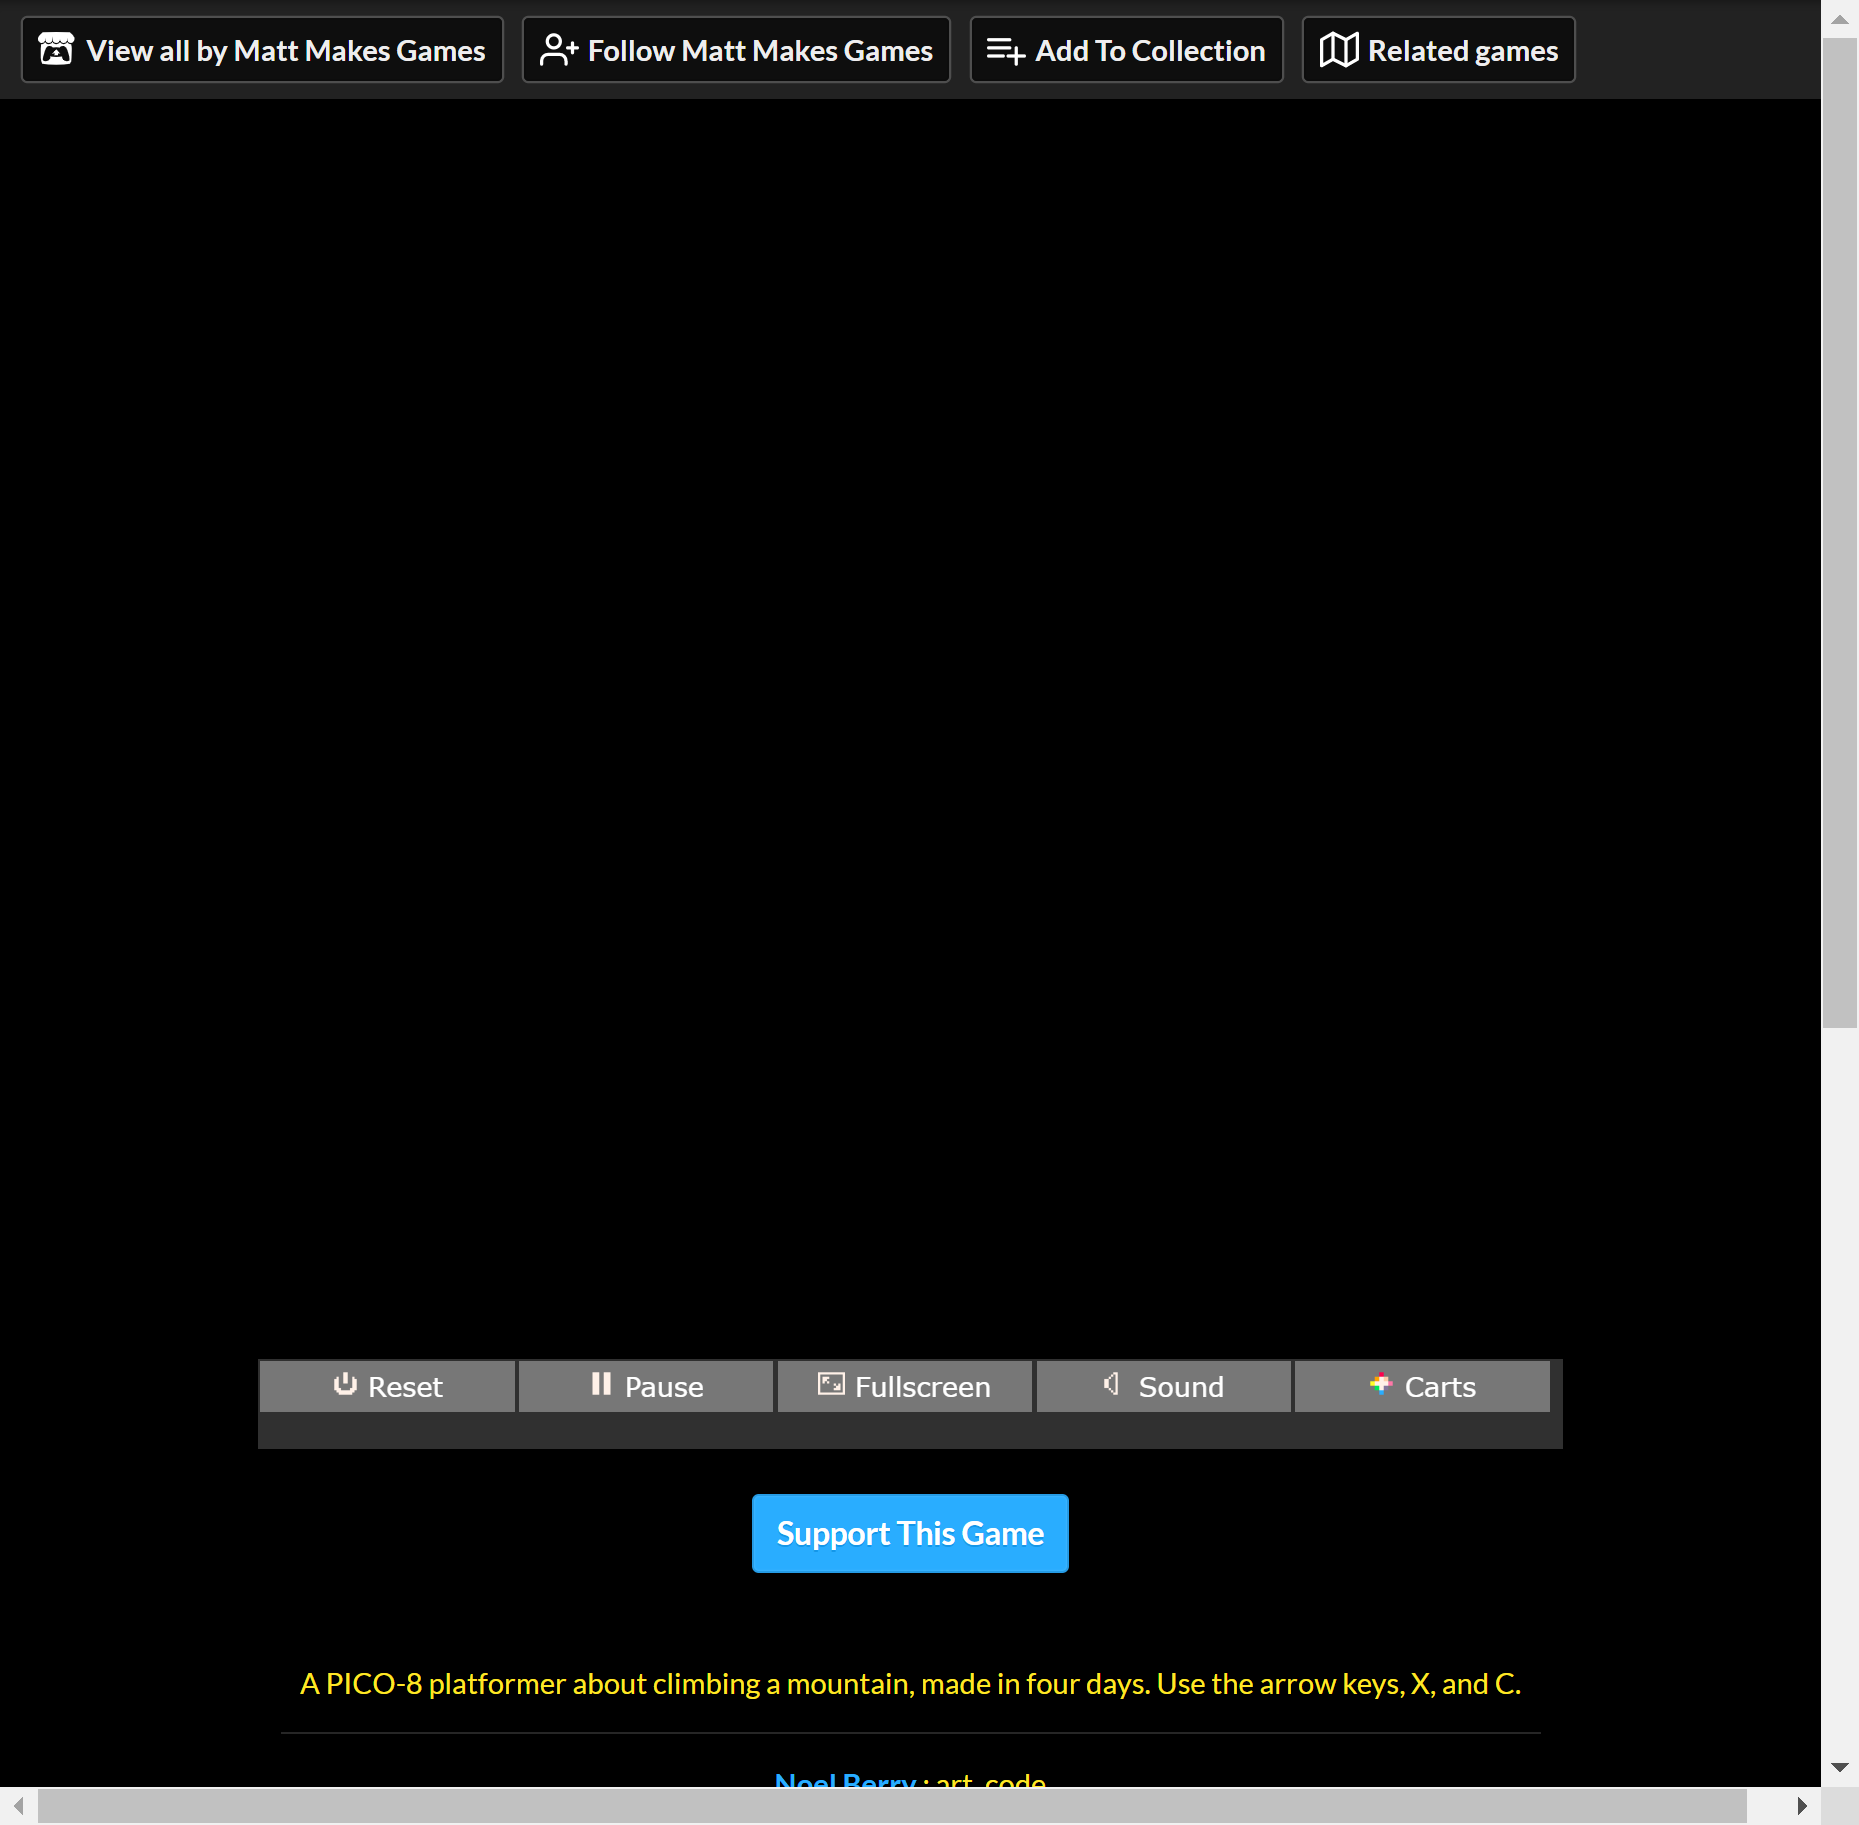

In [22]:
assert len(screenshots) > 0
display(Image(screenshots[0]))

In [20]:
len(screenshots)

0